In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import autograd.numpy as np

# add the data folder to path (this specifies a relative path to where my data is stored)
import os, sys
sys.path.append(os.path.join(os.getcwd(), "../data"))
from data import data_utils 

In [2]:
x_train, x_valid, x_test, y_train, y_valid, y_test = data_utils.load_dataset('iris')
x_train = np.hstack([np.ones(x_train.shape[0]).reshape(-1,1), x_train])
x_valid = np.hstack([np.ones(x_valid.shape[0]).reshape(-1,1), x_valid])
x_test = np.hstack([np.ones(x_test.shape[0]).reshape(-1,1), x_test])

x_train = np.vstack([x_train, x_valid])

y_train = np.vstack([y_train, y_valid])
y_train, y_test = y_train[:,(1,)], y_test[:,(1,)]




In [3]:
x_test.shape

(15, 5)

In [4]:
np.ones(19).shape

(19,)

In [5]:
y_test.shape

(15, 1)

In [6]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [7]:
def Probability(X, W):
    return sigmoid(np.dot(X,W))

In [8]:
W = np.zeros(5)

In [9]:
p = Probability(x_test,W)

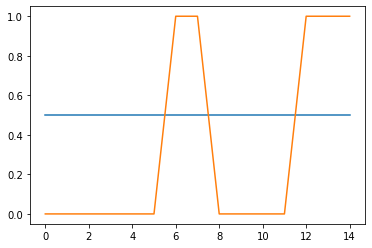

In [10]:
prediction = Probability(x_test, W)

plt.plot(prediction)
plt.plot(y_test)
plt.show()

In [11]:
def update_parameters(w, grad_w, learning_rate=1.):    
    return w + learning_rate * grad_w

def grad(x,y,w):
#     p = Probability(x, w)
#     print('shape of prob',p.shape)
#     p = y
#     print('shape of y',y.shape)
    prob = (y.reshape(-1) - Probability(x, w))
#     print(prob.shape)
    return np.dot(prob,x)

def loss(x,y,w):
#     print('x shape',x.shape)
#     print('y shape',y.shape)
#     print('w shape',w.shape)
    
    prob = np.log(Probability(x, w).reshape(-1,1))
    a = np.dot(y.T,prob)
    b = np.dot((1-y.reshape(-1)),np.log(1 - Probability(x, w).reshape(-1)))
    return a + b

In [12]:
W = np.zeros(5)
gradient = grad(x_train,y_train,W)
print(W.shape)
print(gradient.shape)

W = update_parameters(W,gradient)
print(W.shape)


(5,)
(5,)
(5,)


In [1]:
W = np.zeros(5)
learning_rate = 0.05
losses = []
for i in range(2000):
    W_grad = grad(x_train,y_train,W)
    W = update_parameters(W, W_grad, learning_rate)
    losses.append(loss(x_train,y_train, W).reshape(-1))
    if i==0 or (i+1) % 200 == 0:
        print("Iter %3d, loss = %.6f" % (i+1, loss(x_train,y_train, W)))

NameError: name 'np' is not defined

In [32]:
def accuracy(y,ypredicted):
    count = len(y)
    correct = 0
    for i in range(0,len(y)):
        if y[i] == 0 and ypredicted[i] < .5:
            correct += 1
        elif y[i] == 1 and ypredicted[i] > .5:
            correct += 1
    return correct/count

0.7333333333333333


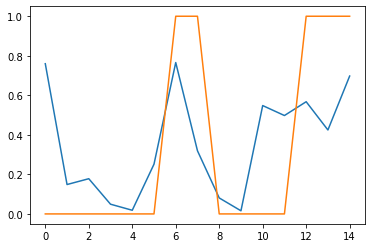

array([[-6.91713216]])

In [34]:
prediction = Probability(x_test, W)
acc = accuracy(y_test,prediction)
print(acc)
plt.plot(prediction)
plt.plot(y_test)
plt.show()

loss(x_test,y_test, W)

<function matplotlib.pyplot.show(*args, **kw)>

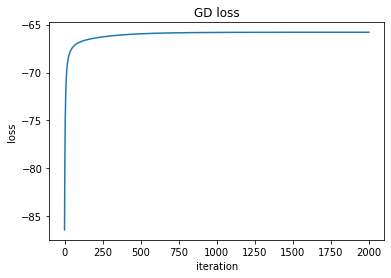

In [20]:
plt.plot(losses)
plt.title('GD loss')
plt.ylabel('loss')
plt.xlabel('iteration')
plt.show

In [17]:
print(W)

[-0.97794274  0.04087035 -1.23080427  2.07270466 -2.04672443]


Iter   1, loss = -92.762083
Iter 200, loss = -69.115800
Iter 400, loss = -67.763564
Iter 600, loss = -67.275517
Iter 800, loss = -67.005426
Iter 1000, loss = -66.831321
Iter 1200, loss = -66.707045
Iter 1400, loss = -66.610858
Iter 1600, loss = -66.531794
Iter 1800, loss = -66.464092
Iter 2000, loss = -66.404594


<function matplotlib.pyplot.show(*args, **kw)>

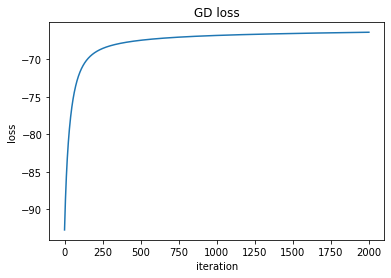

In [29]:
W = np.zeros(5)
learning_rate = 0.0005
losses = []
for i in range(2000):
    W_grad = grad(x_train,y_train,W)
    W = update_parameters(W, W_grad, learning_rate)
    losses.append(loss(x_train,y_train, W).reshape(-1))
    if i==0 or (i+1) % 200 == 0:
        print("Iter %3d, loss = %.6f" % (i+1, loss(x_train,y_train, W)))

plt.plot(losses)
plt.title('GD loss')
plt.ylabel('loss')
plt.xlabel('iteration')
plt.show

Iter   1, loss = -93.492587
Iter 200, loss = -82.960774
Iter 400, loss = -77.920848
Iter 600, loss = -74.990364
Iter 800, loss = -73.120585
Iter 1000, loss = -71.856654
Iter 1200, loss = -70.963671
Iter 1400, loss = -70.309301
Iter 1600, loss = -69.814605
Iter 1800, loss = -69.430346
Iter 2000, loss = -69.124660


<function matplotlib.pyplot.show(*args, **kw)>

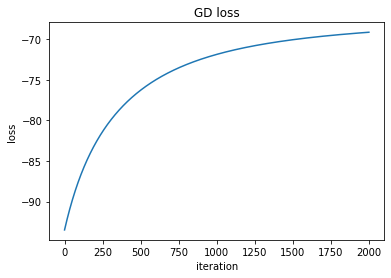

In [30]:
W = np.zeros(5)
learning_rate = 0.00005
losses = []
for i in range(2000):
    W_grad = grad(x_train,y_train,W)
    W = update_parameters(W, W_grad, learning_rate)
    losses.append(loss(x_train,y_train, W).reshape(-1))
    if i==0 or (i+1) % 200 == 0:
        print("Iter %3d, loss = %.6f" % (i+1, loss(x_train,y_train, W)))

plt.plot(losses)
plt.title('GD loss')
plt.ylabel('loss')
plt.xlabel('iteration')
plt.show